In [1]:
#2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from numpy.linalg import pinv

# Load the data
df = pd.read_excel(r"C:\Users\vijay\Documents\sem4\ML\Lab Session1 Data.xlsx")
col=["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]
data_matrix = df[col]
A=data_matrix.values
C =df[["Payment (Rs)"]].values

# Dimensionality of the vector space
dimensionality = A.shape[1]

# Number of vectors
num_vectors = A.shape[0]

# Rank of Matrix A
rank_A = np.linalg.matrix_rank(A)

# Pseudo-Inverse to find the cost of each product
pseudo_inverse_A = np.linalg.pinv(A)
X = np.dot(pseudo_inverse_A, C)

# Mark customers as RICH or POOR
df['Customer_Type'] = np.where(df['Payment (Rs)'] > 200, 'RICH', 'POOR')

# Encode 'Customer_Type' to numerical values
label_encoder = LabelEncoder()
df['Customer_Type'] = label_encoder.fit_transform(df['Customer_Type'])

# Train-test split for classification
X_classification = df[col].to_numpy()
y_classification = df['Customer_Type'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2)

# Train a classifier model (e.g., Logistic Regression)
classifier_model = LinearRegression()
classifier_model.fit(X_train, y_train)

# Predictions
y_pred = classifier_model.predict(X_test)

# Calculate classification metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Dimensionality of the vector space: {dimensionality}")
print(f"Number of vectors in the vector space: {num_vectors}")
print(f"Rank of Matrix A: {rank_A}")
print(f"Cost of each product (using Pseudo-Inverse):\n{X}")
print(f"Classification Metrics:\nMSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nR2 Score: {r2}")


Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product (using Pseudo-Inverse):
[[ 1.]
 [55.]
 [18.]]
Classification Metrics:
MSE: 0.02456971620975006
RMSE: 0.15674730048632435
MAE: 0.1380021230465308
R2 Score: 0.9017211351609997


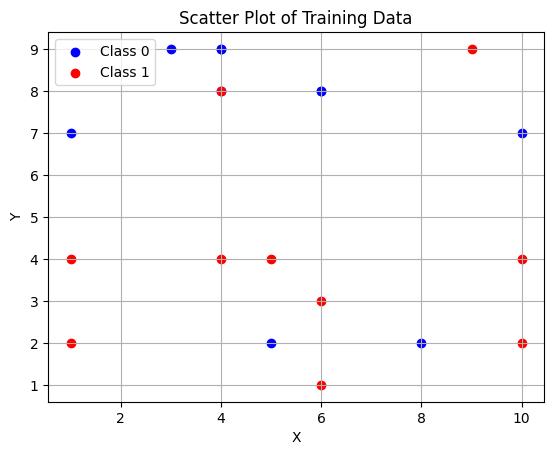

In [2]:
#3
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points for class0 (Blue)
np.random.seed(0)  # For reproducibility
class0_x = np.random.randint(1, 11, 10)
class0_y = np.random.randint(1, 11, 10)

# Generate random data points for class1 (Red)
class1_x = np.random.randint(1, 11, 10)
class1_y = np.random.randint(1, 11, 10)

# Create scatter plot
plt.scatter(class0_x, class0_y, color='blue', label='Class 0')
plt.scatter(class1_x, class1_y, color='red', label='Class 1')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


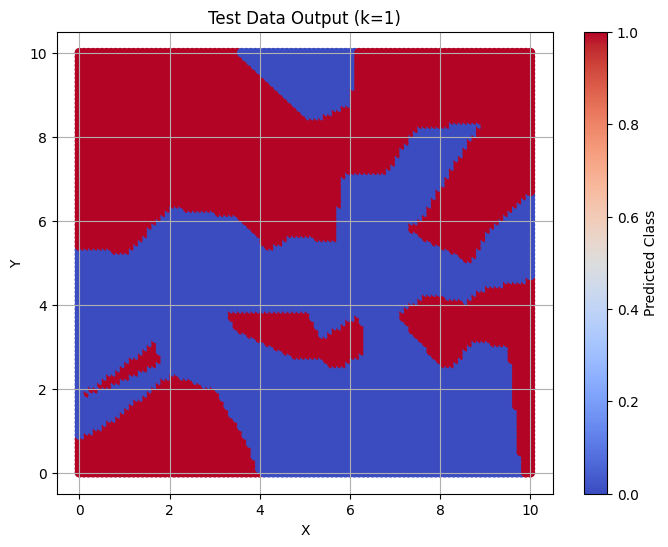

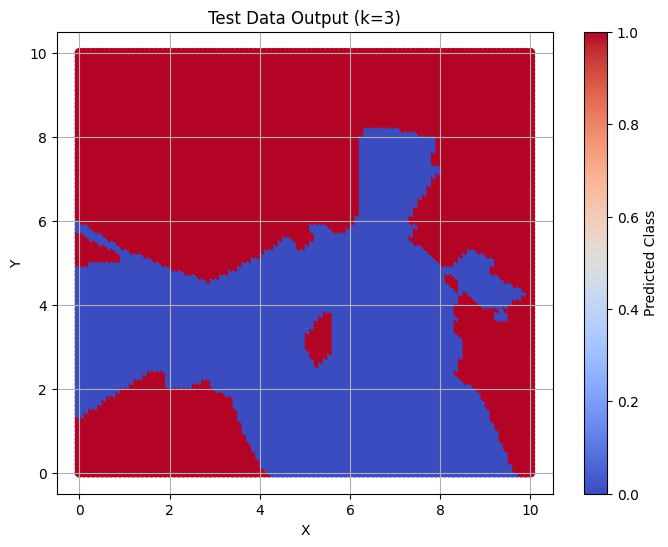

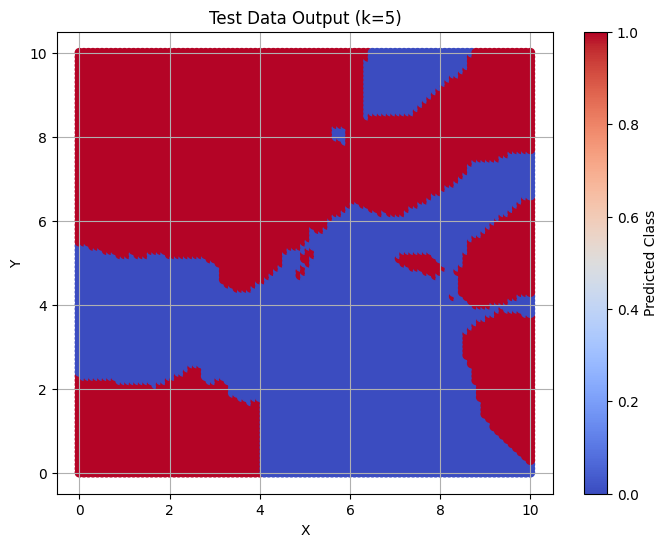

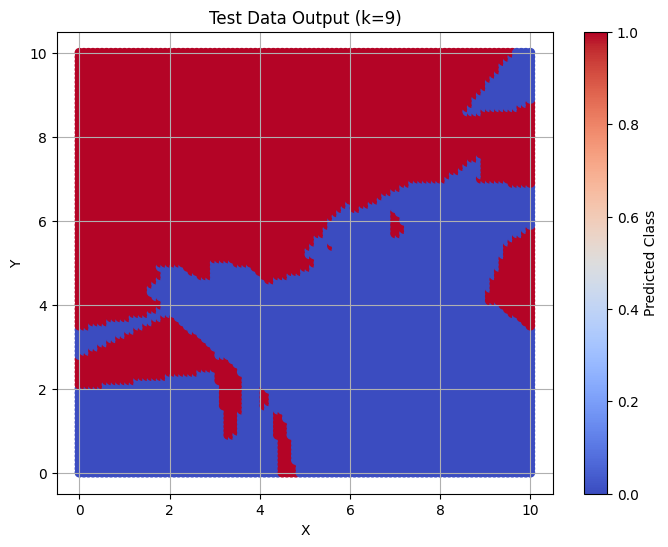

In [3]:
#4,5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assuming the training data is available in these variables
class0_x = np.random.uniform(low=1, high=10, size=(20,))
class0_y = np.random.uniform(low=1, high=10, size=(20,))
class1_x = np.random.uniform(low=1, high=10, size=(20,))
class1_y = np.random.uniform(low=1, high=10, size=(20,))

# Step 1: Generate test data points
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
test_points = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1, 2)

# Step 2: Classify the test data points using kNN classifier
def classify_with_knn(k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(np.column_stack((np.concatenate((class0_x, class1_x)), np.concatenate((class0_y, class1_y)))), 
                       np.concatenate((np.zeros_like(class0_x), np.ones_like(class1_x))))
    predicted_labels = knn_classifier.predict(test_points)
    return predicted_labels

# Step 3: Make a scatter plot of the test data output
def plot_test_data(predicted_labels, k):
    plt.figure(figsize=(8, 6))
    plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_labels, cmap=plt.cm.coolwarm)
    plt.title(f'Test Data Output (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(label='Predicted Class')
    plt.grid(True)
    plt.show()

# Step 4: Repeat the process for various values of k and observe the class boundary lines
for k in [1, 3, 5, 9]:
    predicted_labels = classify_with_knn(k)
    plot_test_data(predicted_labels, k)


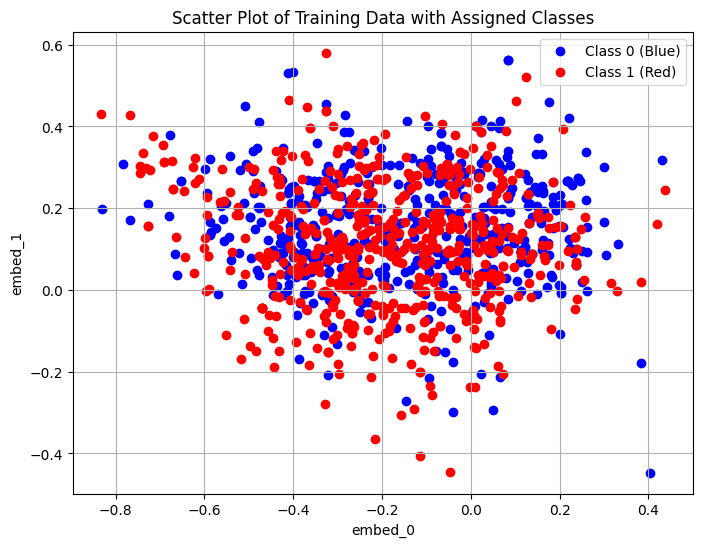

In [4]:
#6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel(r"C:\Users\vijay\Documents\sem4\ML\training_mathbert 2.xlsx")

feature_1 = 'embed_0'
feature_2 = 'embed_1'
class_feature = df["output"].values

# Assign classes based on the payment amount
df['Class'] = np.where(class_feature > 3, 1, 0)

# Define colors for each class
colors = {0: 'blue', 1: 'red'}

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Class'] == 0][feature_1], df[df['Class'] == 0][feature_2], color=colors[0], label='Class 0 (Blue)')
plt.scatter(df[df['Class'] == 1][feature_1], df[df['Class'] == 1][feature_2], color=colors[1], label='Class 1 (Red)')

# Add labels and legend
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Scatter Plot of Training Data with Assigned Classes')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [5]:
#7
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load your data from a CSV file
data = pd.read_excel(r"C:\Users\vijay\Documents\sem4\ML\training_mathbert 2.xlsx")

# Assume your CSV file has columns named 'X1', 'X2', and 'label' (replace with your actual column names)
feature_1 = 'embed_0'
feature_2 = 'embed_1'

X = data[[feature_1, feature_2]].values
y = data["output"].values

# Discretize the continuous values into classes
y_class = pd.cut(y, bins=[-float('inf'), 1, 2, 3, 4, 5, float('inf')], labels=[0, 1, 2, 3, 4, 5], right=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Define the kNN classifier
knn_classifier = KNeighborsClassifier()

# Specify the hyperparameter grid to search
param_dist = {'n_neighbors': range(1, 20)}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Parameters: ", random_search.best_params_)

# Get the best kNN model with the tuned hyperparameters
best_knn_model = random_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_knn_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Best Parameters:  {'n_neighbors': 9}
Test Accuracy: 30.09%
